# Download dataset

## Create folder for dataset

In [10]:
import os
HOME = os.getcwd()
try:
    os.mkdir('datasets')
except FileExistsError as file_exist_error:
    print("Cannot create a file when folder 'datasets' already exists")

Cannot create a file when folder 'datasets' already exists


In [11]:
# Change current directory to dataset
%cd {HOME}/datasets

C:\D\Python\portfolio\Projects\pills-detection\datasets


## Create ```HOME``` env 

In [12]:
os.environ['HOME'] = "C:\D\Python\portfolio\Projects\pills-detection"

## Downloading dataset

In [13]:
from roboflow import Roboflow
rf = Roboflow(api_key="QvBVrFs8SdlwCX7XOhBR")
project = rf.workspace("seblful").project("pills-detection-s9ywn")
dataset = project.version(19).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.55, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Pills-Detection-19 in yolov8:: 100%|███████████| 3330/3330 [00:02<00:00, 1400.20it/s]


In [14]:
# Change current directory to HOME
%cd {HOME}

C:\D\Python\portfolio\Projects\pills-detection


# Training

## Train with CLI

In [8]:
# What is dataset location?
dataset.location

# Sometimes you need to change location to absolute path in data.yaml

'C:\\D\\Python\\portfolio\\Projects\\pills-detection\\Pills-Detection-19'

In [9]:
# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=1 imgsz=640 plots=True

## Train with Python

In [10]:
# Ultralytics check
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.55  Python-3.10.9 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Setup complete  (20 CPUs, 15.7 GB RAM, 350.7/457.8 GB disk)


In [11]:
# PyTorch check
import torch
torch.__version__

'2.0.0+cu117'

In [12]:
# Instantiate device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Current device is {device}")

Current device is cuda


In [15]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s.yaml")  # build a new model from scratch
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

# Transform model to GPU
# model.to(device)

# Use the model
model.train(data=dataset.location+'\\data.yaml', epochs=100, imgsz=640, batch=8)  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

In [16]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.55  Python-3.10.9 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning C:\D\Python\portfolio\Projects\Pills-object-detection\datasets\Pills-Detection-19\valid\labels.cache... 1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:23
                   all        135       2601      0.888      0.874      0.931       0.57
              capsules        135        837      0.845      0.832      0.908      0.555
               tablets        135       1764      0.931      0.916      0.954      0.584
Speed: 1.0ms preprocess, 12.0ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs\detect\val


In [17]:
results = model("https://upload.wikimedia.org/wikipedia/commons/f/fe/Prozac_pills.jpg")  # predict on an image
success = model.export(format="onnx")  # export the model to ONNX format


100%|█████████████████████████████████████████████████████████████████████████████| 1.43M/1.43M [00:00<00:00, 2.21MB/s]
image 1/1 C:\D\Python\portfolio\Projects\Pills-object-detection\Prozac_pills.jpg: 480x640 12 capsuless, 157.1ms
Speed: 0.0ms preprocess, 157.1ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.55  Python-3.10.9 torch-2.0.0+cu117 CPU

PyTorch: starting from runs\detect\train\weights\best.pt with input shape (8, 3, 640, 640) BCHW and output shape(s) (8, 6, 8400) (21.5 MB)

ONNX: starting export with onnx 1.13.1...
ONNX: export success  4.2s, saved as runs\detect\train\weights\best.onnx (42.6 MB)

Export complete (8.7s)
Results saved to C:\D\Python\portfolio\Projects\Pills-object-detection\runs\detect\train\weights
Predict:         yolo predict task=detect model=runs\detect\train\weights\best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs\detect\train\weights\best.onnx imgsz=640 data=C:\D\Python\portfolio\Projects

============= Diagnostic Run torch.onnx.export version 2.0.0+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



## Results of training

### Metrics

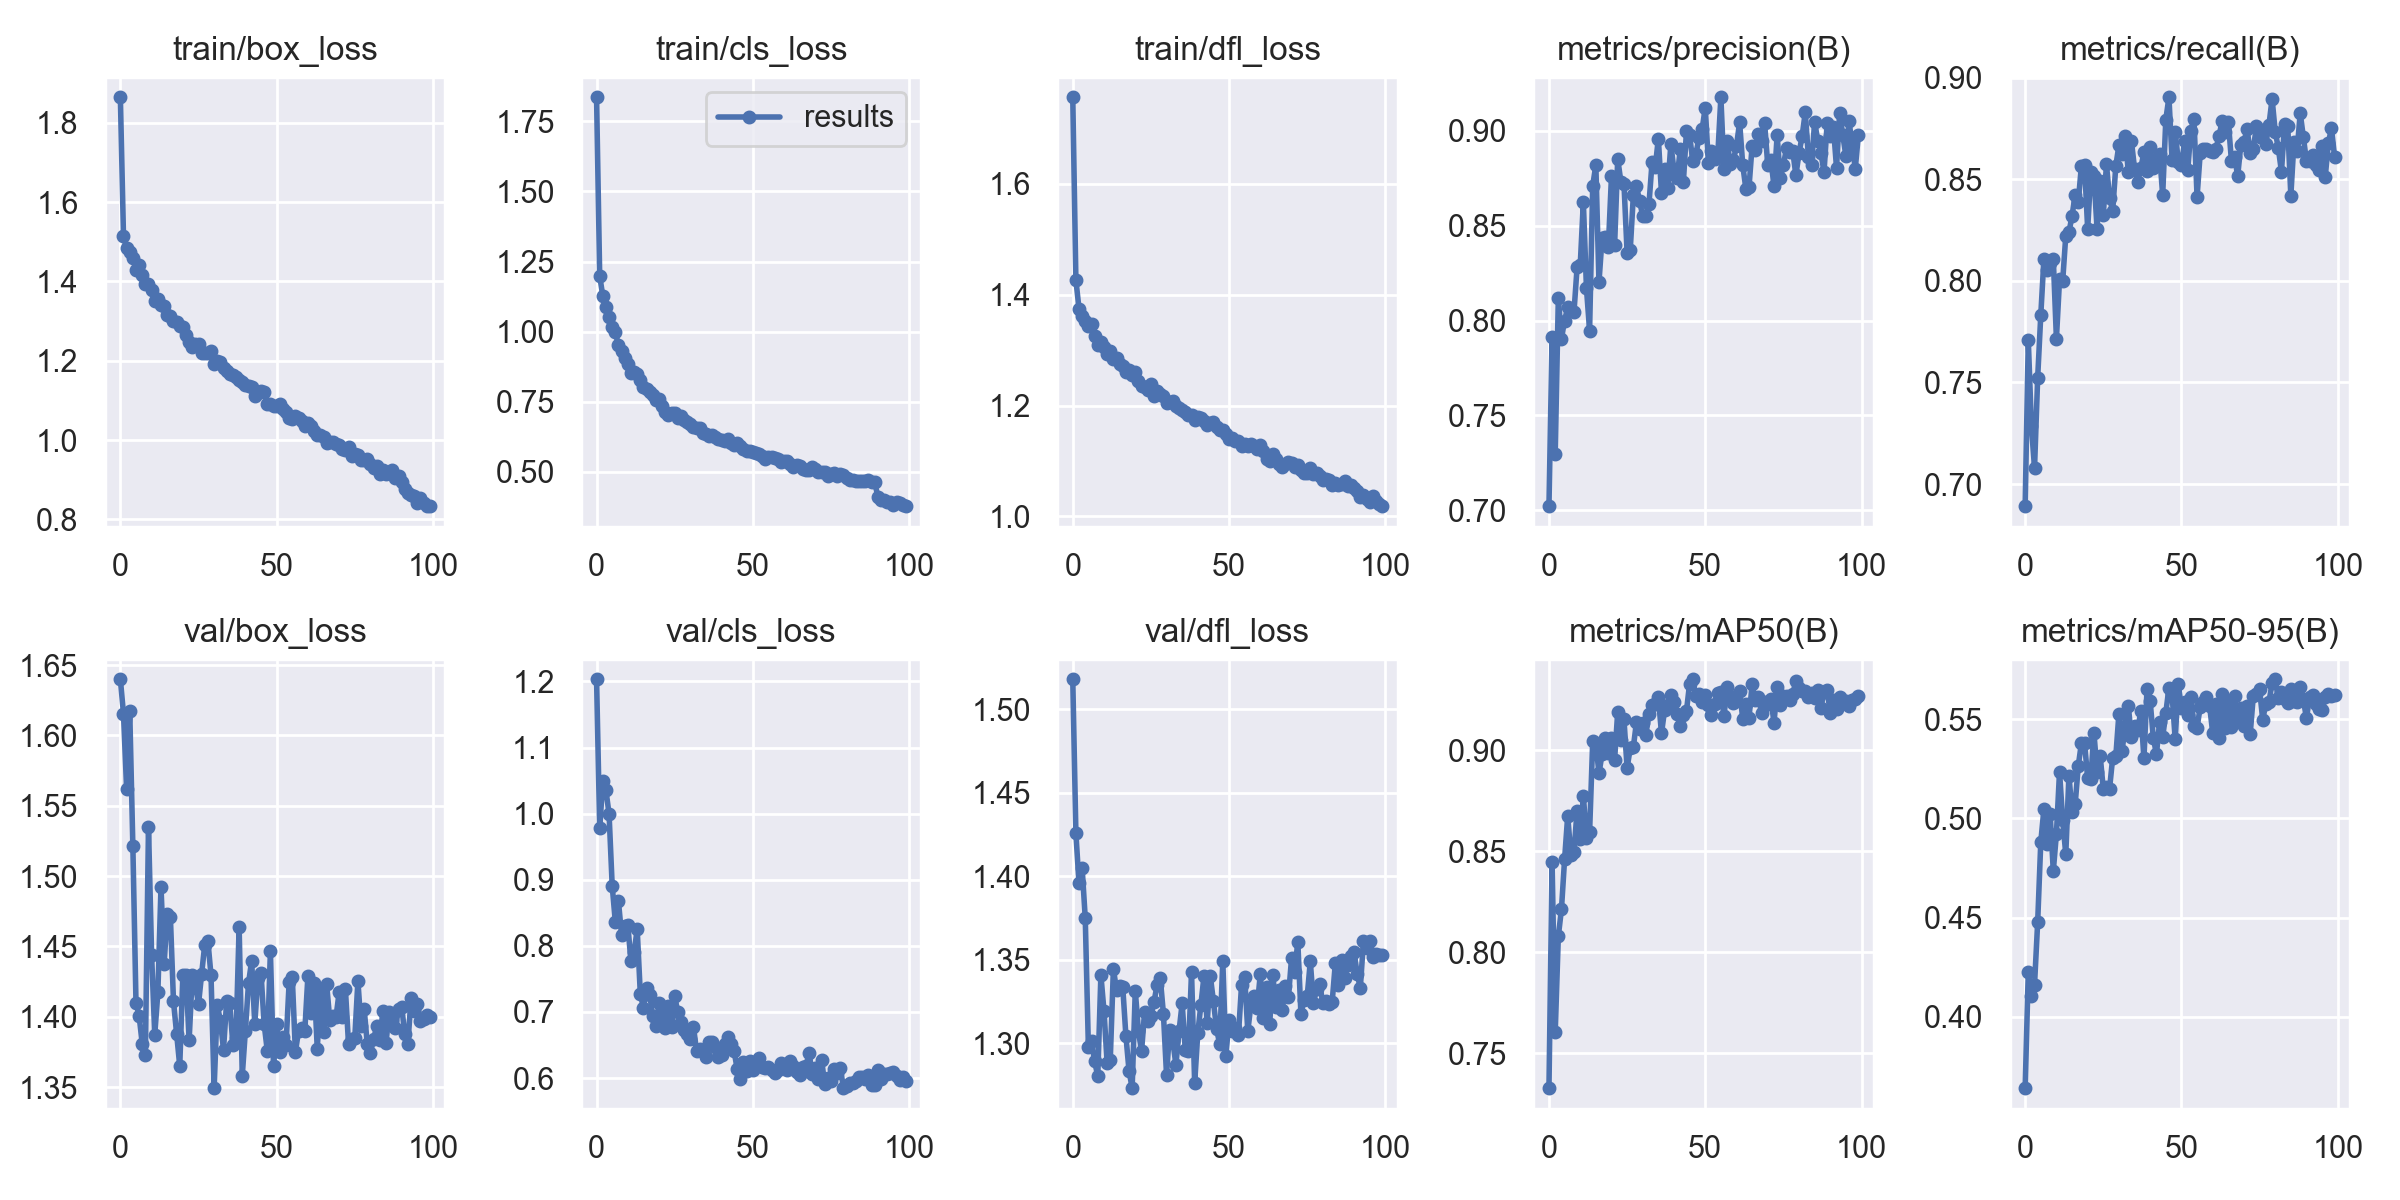

### Confusion matrix

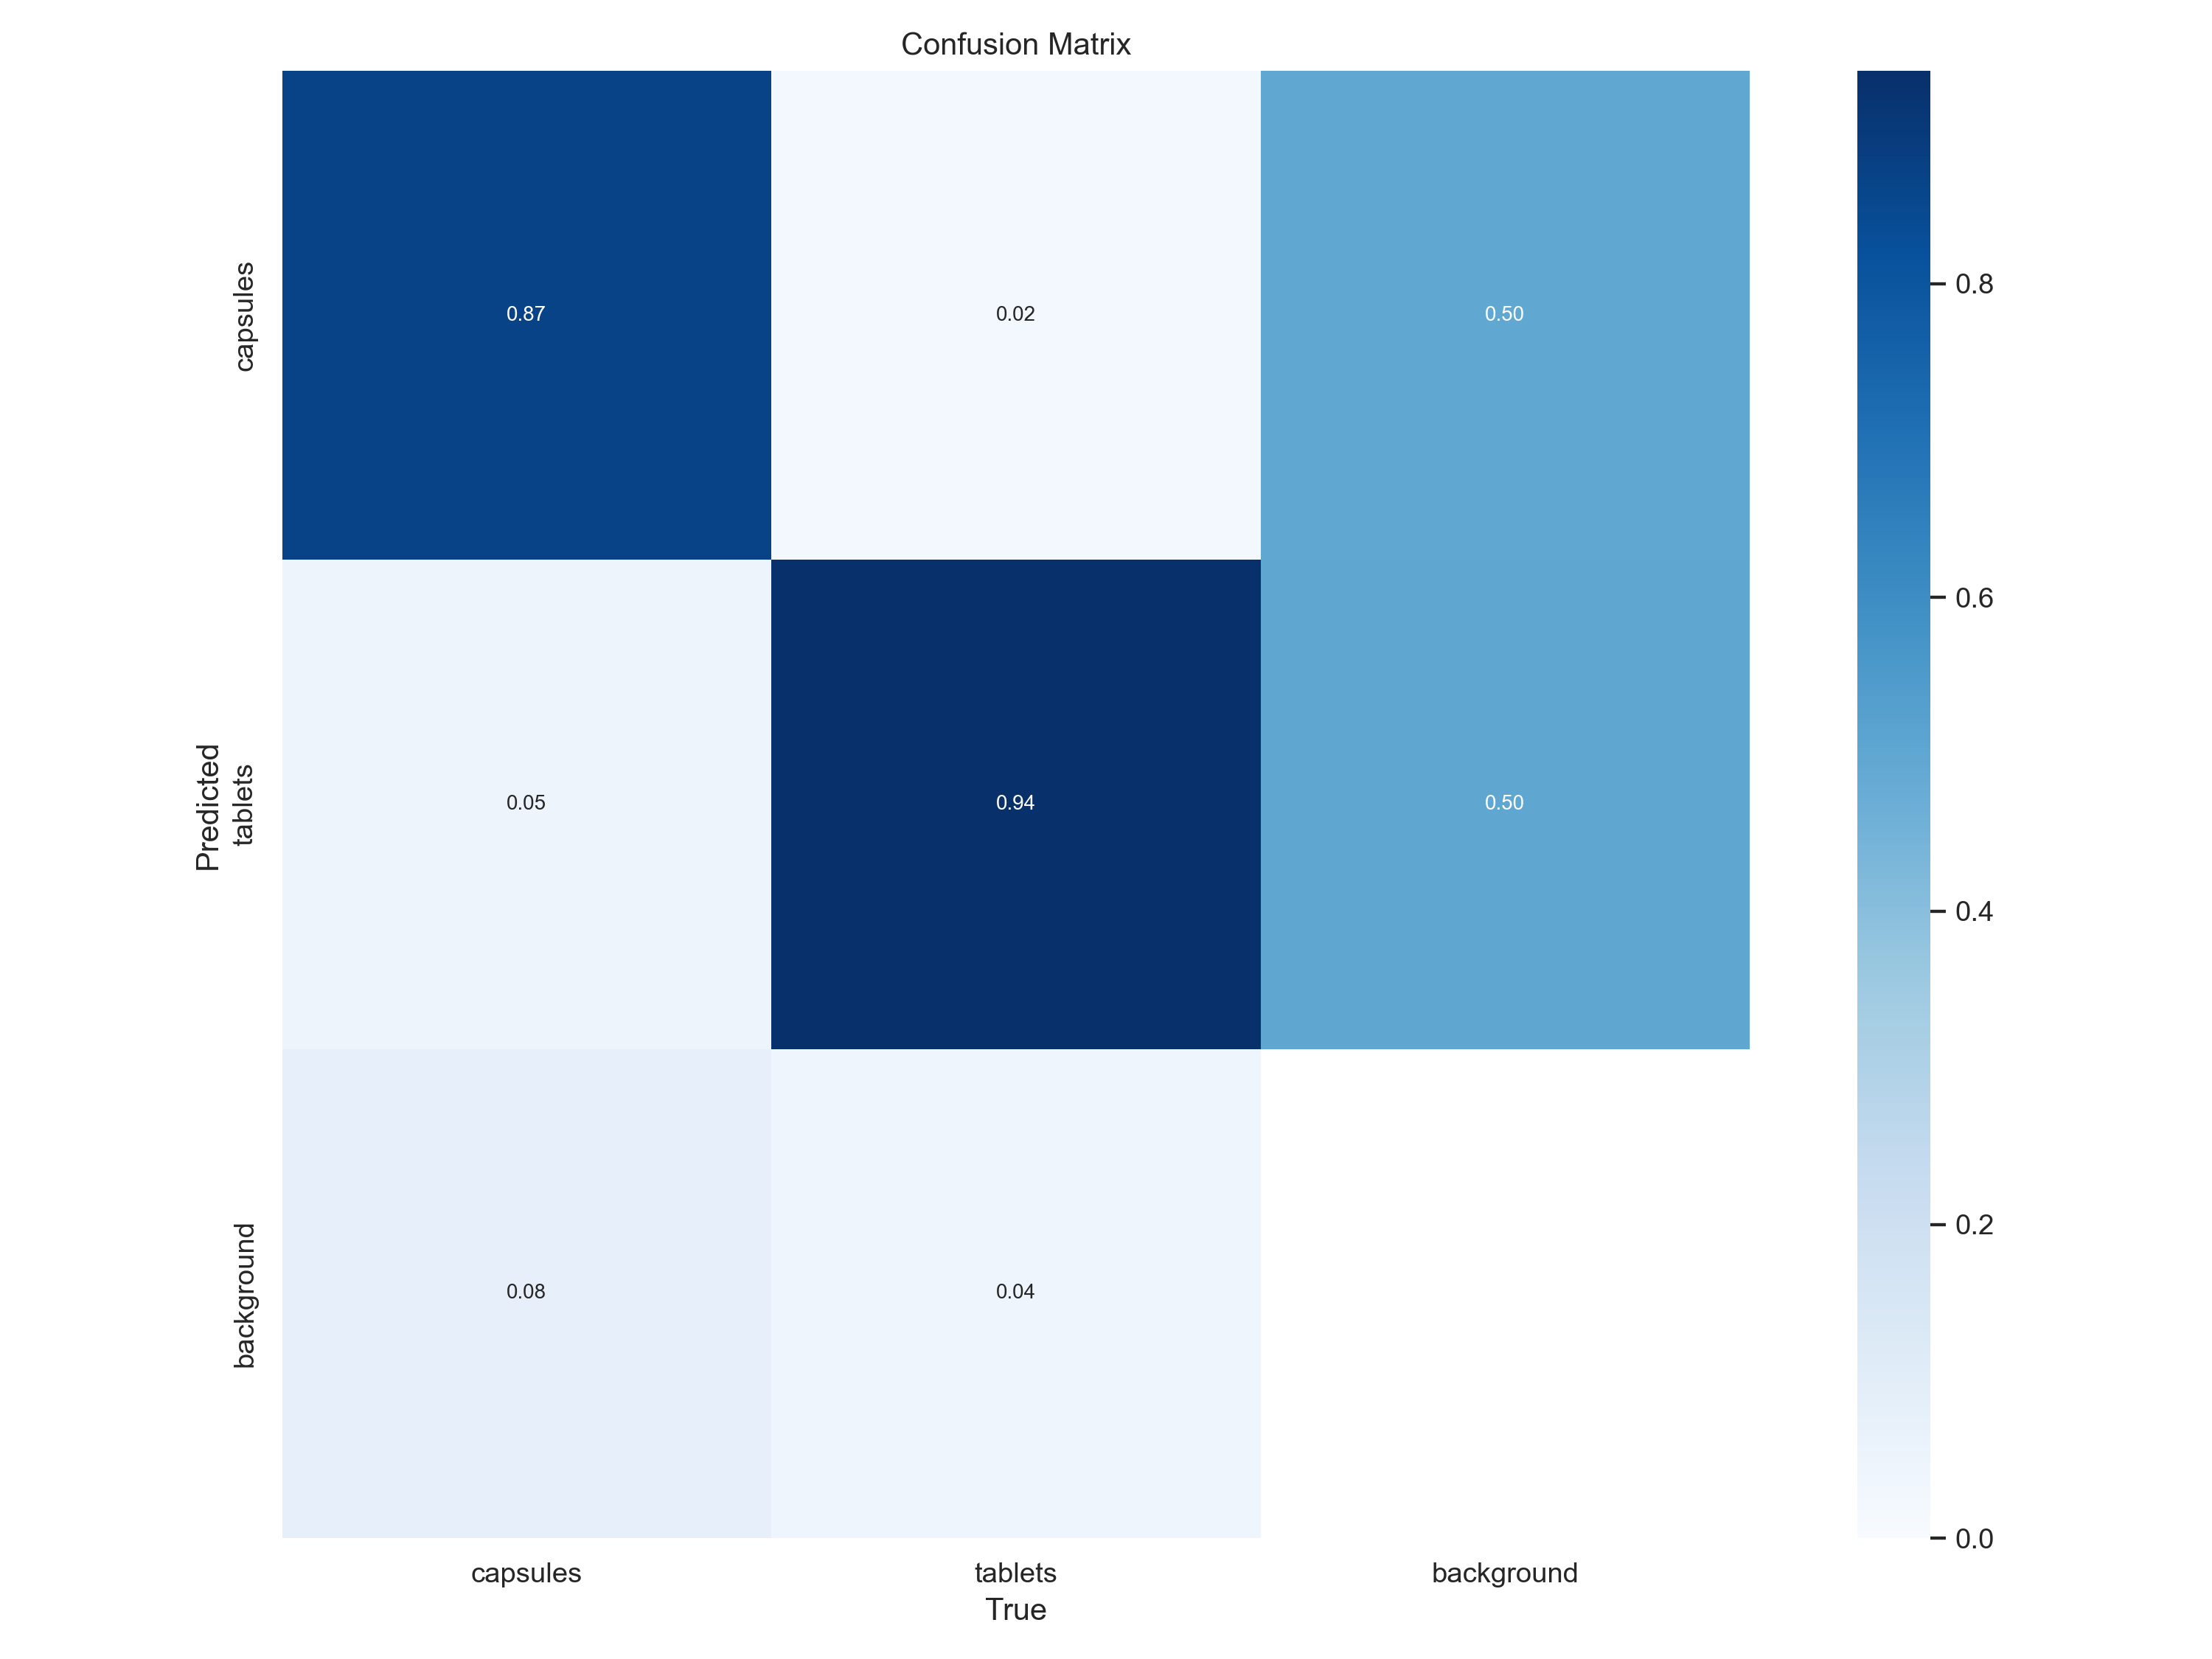

# Detection

In [22]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.4 source={dataset.location}/test/images save=True

C:\D\Python\portfolio\Projects\Pills-object-detection


Ultralytics YOLOv8.0.55  Python-3.10.9 torch-2.0.0+cu117 CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/78 C:\D\Python\portfolio\Projects\Pills-object-detection\datasets\Pills-Detection-19\test\images\1000_F_420127490_zYfufzLT1jVxPzLVJzIh46ZI6FSeML3B_jpg.rf.7120112b9a8cc0b924b6fd51ab0885e5.jpg: 640x640 16 tabletss, 222.0ms
image 2/78 C:\D\Python\portfolio\Projects\Pills-object-detection\datasets\Pills-Detection-19\test\images\1003948616_jpg.rf.43166648d8f9b828c021482abf843451.jpg: 640x640 20 capsuless, 205.6ms
image 3/78 C:\D\Python\portfolio\Projects\Pills-object-detection\datasets\Pills-Detection-19\test\images\1068691880_jpg.rf.1cf866110242da1938949cd92ec46601.jpg: 640x640 8 tabletss, 204.2ms
image 4/78 C:\D\Python\portfolio\Projects\Pills-object-detection\datasets\Pills-Detection-19\test\images\107091458_jpg.rf.e183bba0f8de0f800e7ae4dc7b7eda38.jpg: 640x640 16 capsuless, 112 tabletss, 205.4ms
image 5/78 C:\D\Python\portfolio\Projects\Pi

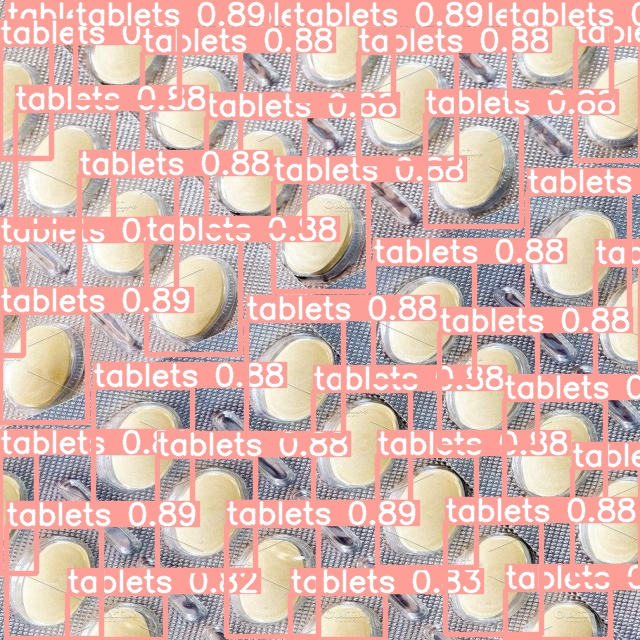

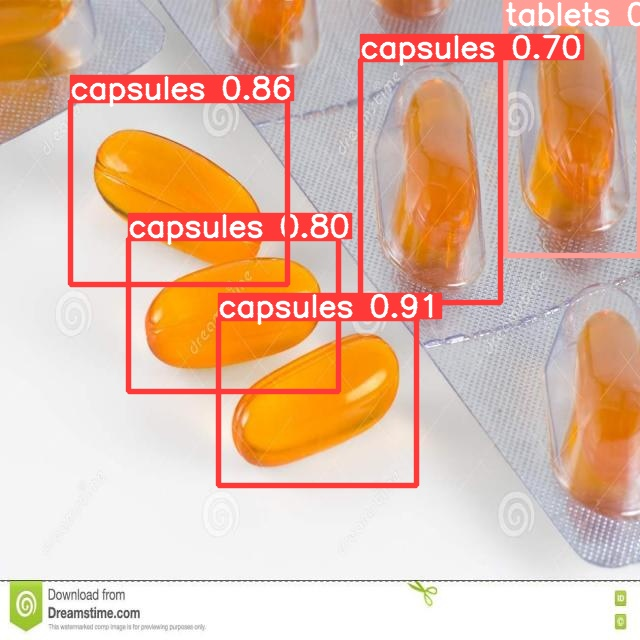

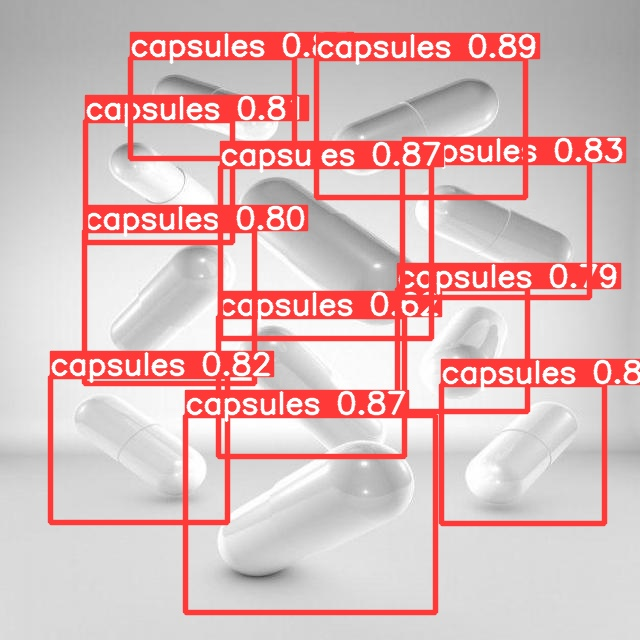

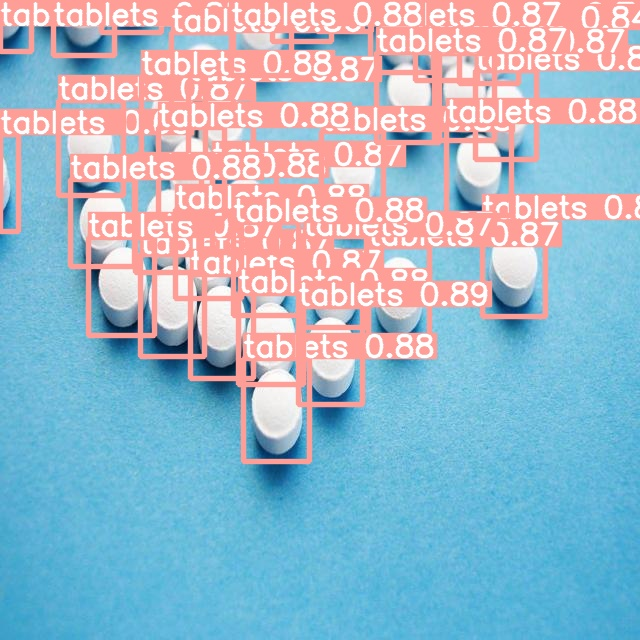

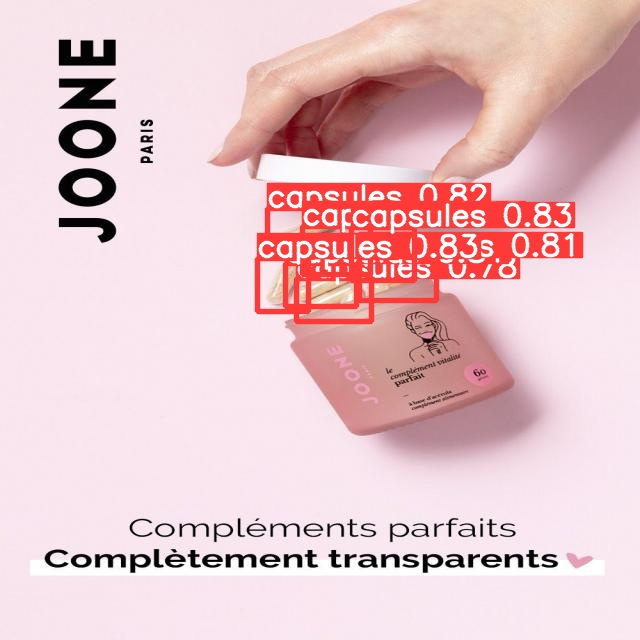

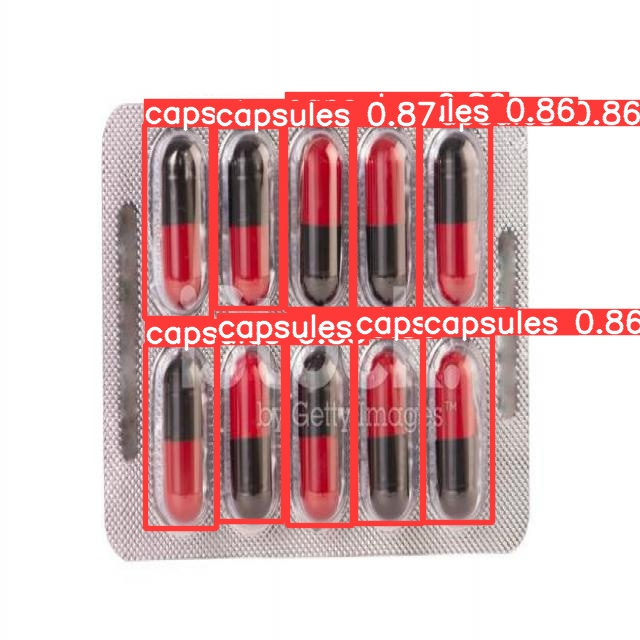

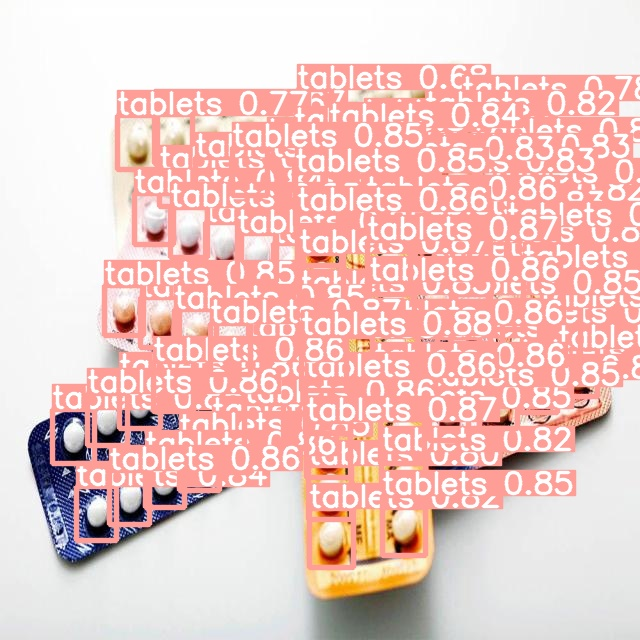

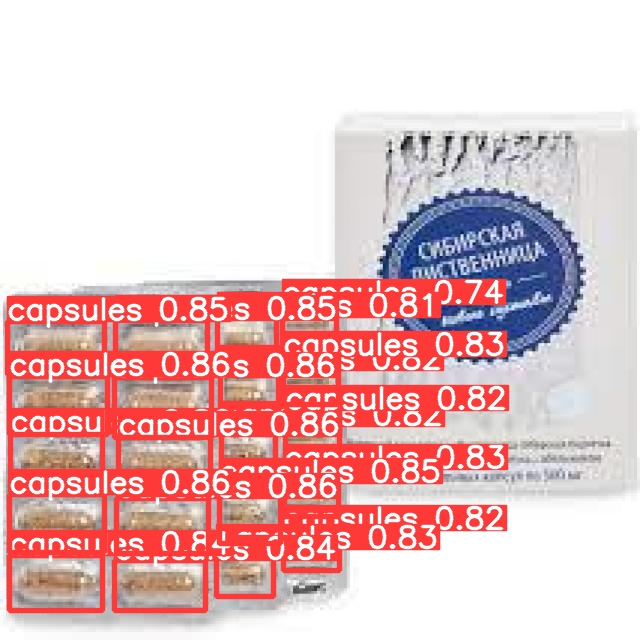

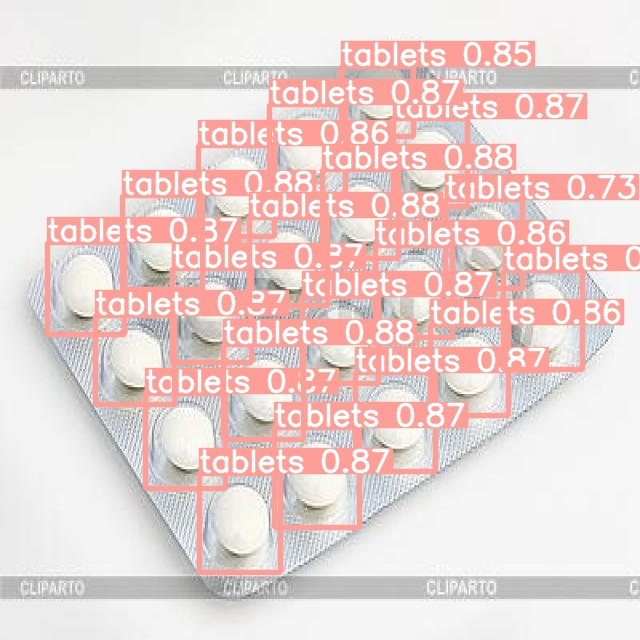

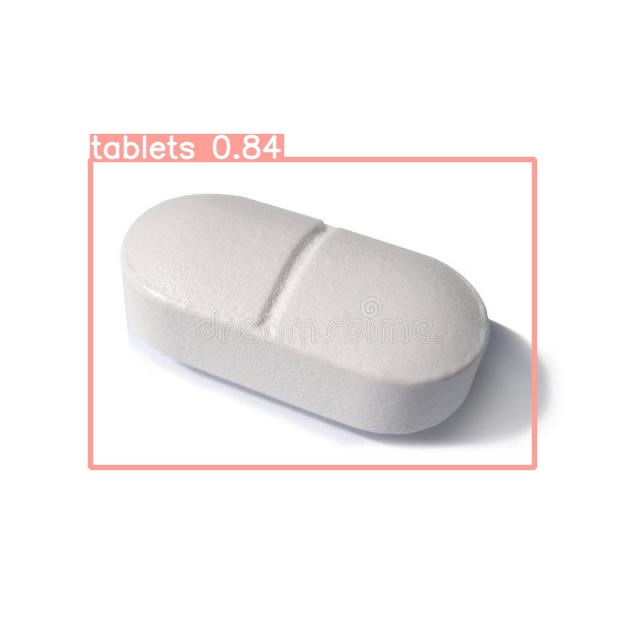

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[6:16]:
      display(Image(filename=image_path, width=800))
      print("\n")

# Deploy model to roboflow

In [24]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics<=8.0.20 is required but found version=8.0.55, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/seblful/pills-detection-s9ywn/deploy/19
Share your model with the world at: https://universe.roboflow.com/seblful/pills-detection-s9ywn/model/19
